In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import hopsworks as hw
import pandas as pd

/Users/jayeshvasudeva/miniconda3/envs/scalable_ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
project = hw.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Multiple projects found. 

	 (1) jayeshv
	 (2) id2223_enric

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/224405
Connected. Call `.close()` to terminate connection gracefully.


In [4]:
df = pd.read_csv('./wine.csv')
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
null_count = sum(df.isnull().to_numpy())
for i, col in enumerate(df.columns):
    print(f"null value count in {col} : {null_count[i]}")

null value count in type : 0
null value count in fixed acidity : 10
null value count in volatile acidity : 8
null value count in citric acid : 3
null value count in residual sugar : 2
null value count in chlorides : 2
null value count in free sulfur dioxide : 0
null value count in total sulfur dioxide : 0
null value count in density : 0
null value count in pH : 9
null value count in sulphates : 4
null value count in alcohol : 0
null value count in quality : 0


In [7]:
df.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [10]:
df.type.value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [11]:
df.duplicated().sum()

1168

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5319.000000       5321.000000  5326.000000     5327.000000   
mean        7.216573          0.344123     0.318738        5.053839   
std         1.319194          0.168228     0.147116        4.504005   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5327.000000          5329.000000           5329.000000  5329.000000   
mean      0.056668            30.060143            114.189341     0.994536   
std       0.036845            17.815588             56.781422     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             75.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994640   
75%       0.066000            41.000000            154.000000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  5320.000000  5325.000000  5329.000000  5329.000000  
mean      3.224434     0.533268    10.548539     5.796022  
std       0.160275     0.149724     1.186134     0.879922  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.400000     6.000000  
75%       3.330000     0.600000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [14]:
df['fixed acidity'].fillna(value=df['fixed acidity'].mean(), inplace=True)
df['volatile acidity'].fillna(value=df['volatile acidity'].mean(), inplace=True)
df['pH'].fillna(value=df['pH'].mean(), inplace=True)
df['chlorides'].fillna(value=df['chlorides'].mean(), inplace=True)
df['residual sugar'].fillna(value=df['residual sugar'].mean(), inplace=True)
df['citric acid'].fillna(value=df['citric acid'].mean(), inplace=True)
df['sulphates'].fillna(value=df['sulphates'].mean(), inplace=True)
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5329.000000       5329.000000  5329.000000     5329.000000   
mean        7.216573          0.344123     0.318738        5.053839   
std         1.317955          0.168102     0.147075        4.503160   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5329.000000          5329.000000           5329.000000  5329.000000   
mean      0.056668            30.060143            114.189341     0.994536   
std       0.036838            17.815588             56.781422     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             75.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994640   
75%       0.066000            41.000000            154.000000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  5329.000000  5329.000000  5329.000000  5329.000000  
mean      3.224434     0.533268    10.548539     5.796022  
std       0.160140     0.149668     1.186134     0.879922  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.400000     6.000000  
75%       3.330000     0.600000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [15]:
null_count = sum(df.isnull().to_numpy())
for i, col in enumerate(df.columns):
    print(f"null value count in {col} : {null_count[i]}")

null value count in type : 0
null value count in fixed acidity : 0
null value count in volatile acidity : 0
null value count in citric acid : 0
null value count in residual sugar : 0
null value count in chlorides : 0
null value count in free sulfur dioxide : 0
null value count in total sulfur dioxide : 0
null value count in density : 0
null value count in pH : 0
null value count in sulphates : 0
null value count in alcohol : 0
null value count in quality : 0


<Axes: >

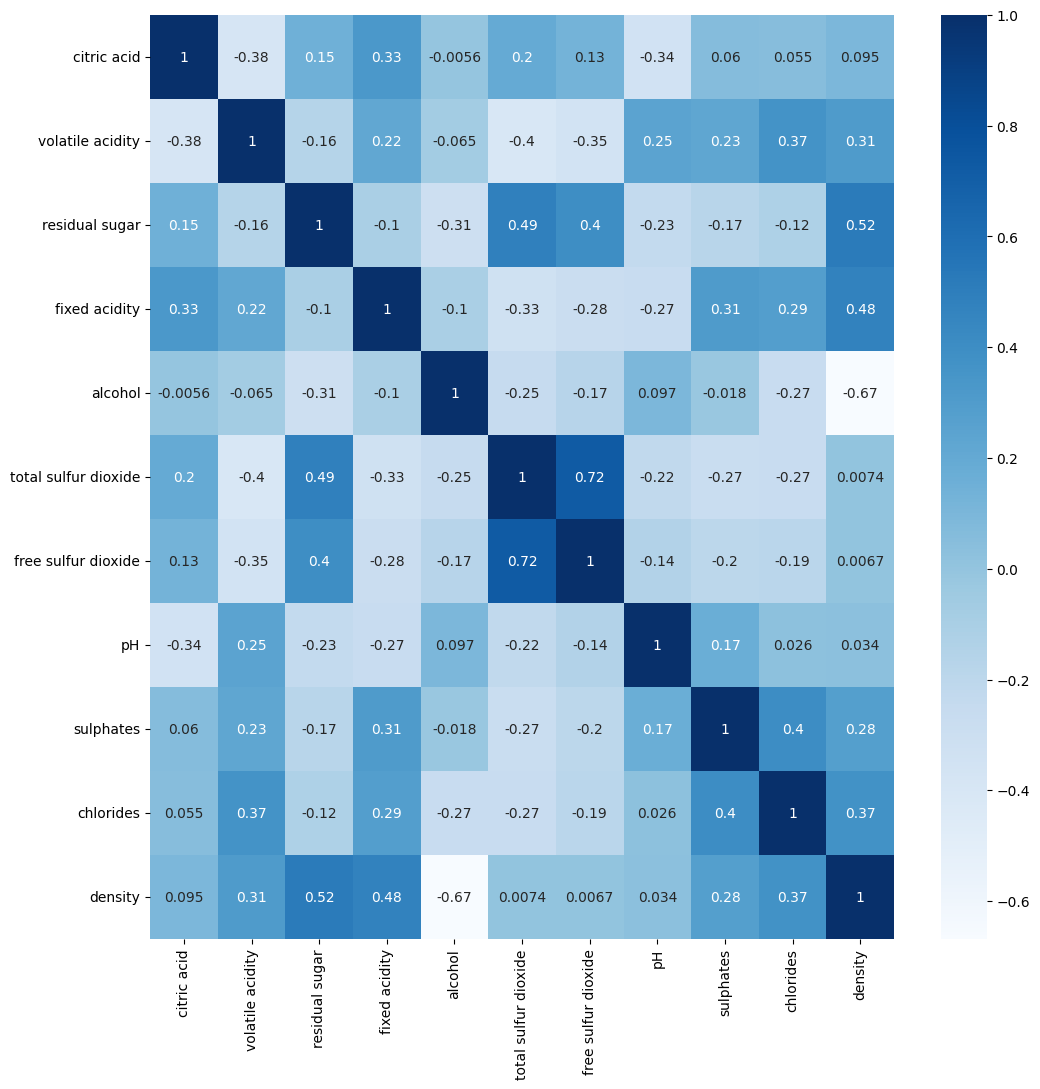

In [16]:
plt.figure(figsize=(12, 12))
corr = df[list(set(df.columns) - set(['type', 'quality']))].corr()
sns.heatmap(corr, annot=True, cmap='Blues')

In [5]:
cat_to_num = {'white': 0, 'red':1}
df['type'] = df['type'].map(cat_to_num)
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [6]:
def normalize_column(df, col:str):

    maxm = df[col].max()
    minm = df[col].min()
    
    return (df[col] - minm) / maxm

cols_tobe_normalized = list(set(df.columns) - set(['type', 'quality']))
df_normalized = df.copy()
for col in cols_tobe_normalized:
    df_normalized[col] = normalize_column(df, col)

## Exploratory Data Analysis (EDA)

<Figure size 2500x400 with 0 Axes>

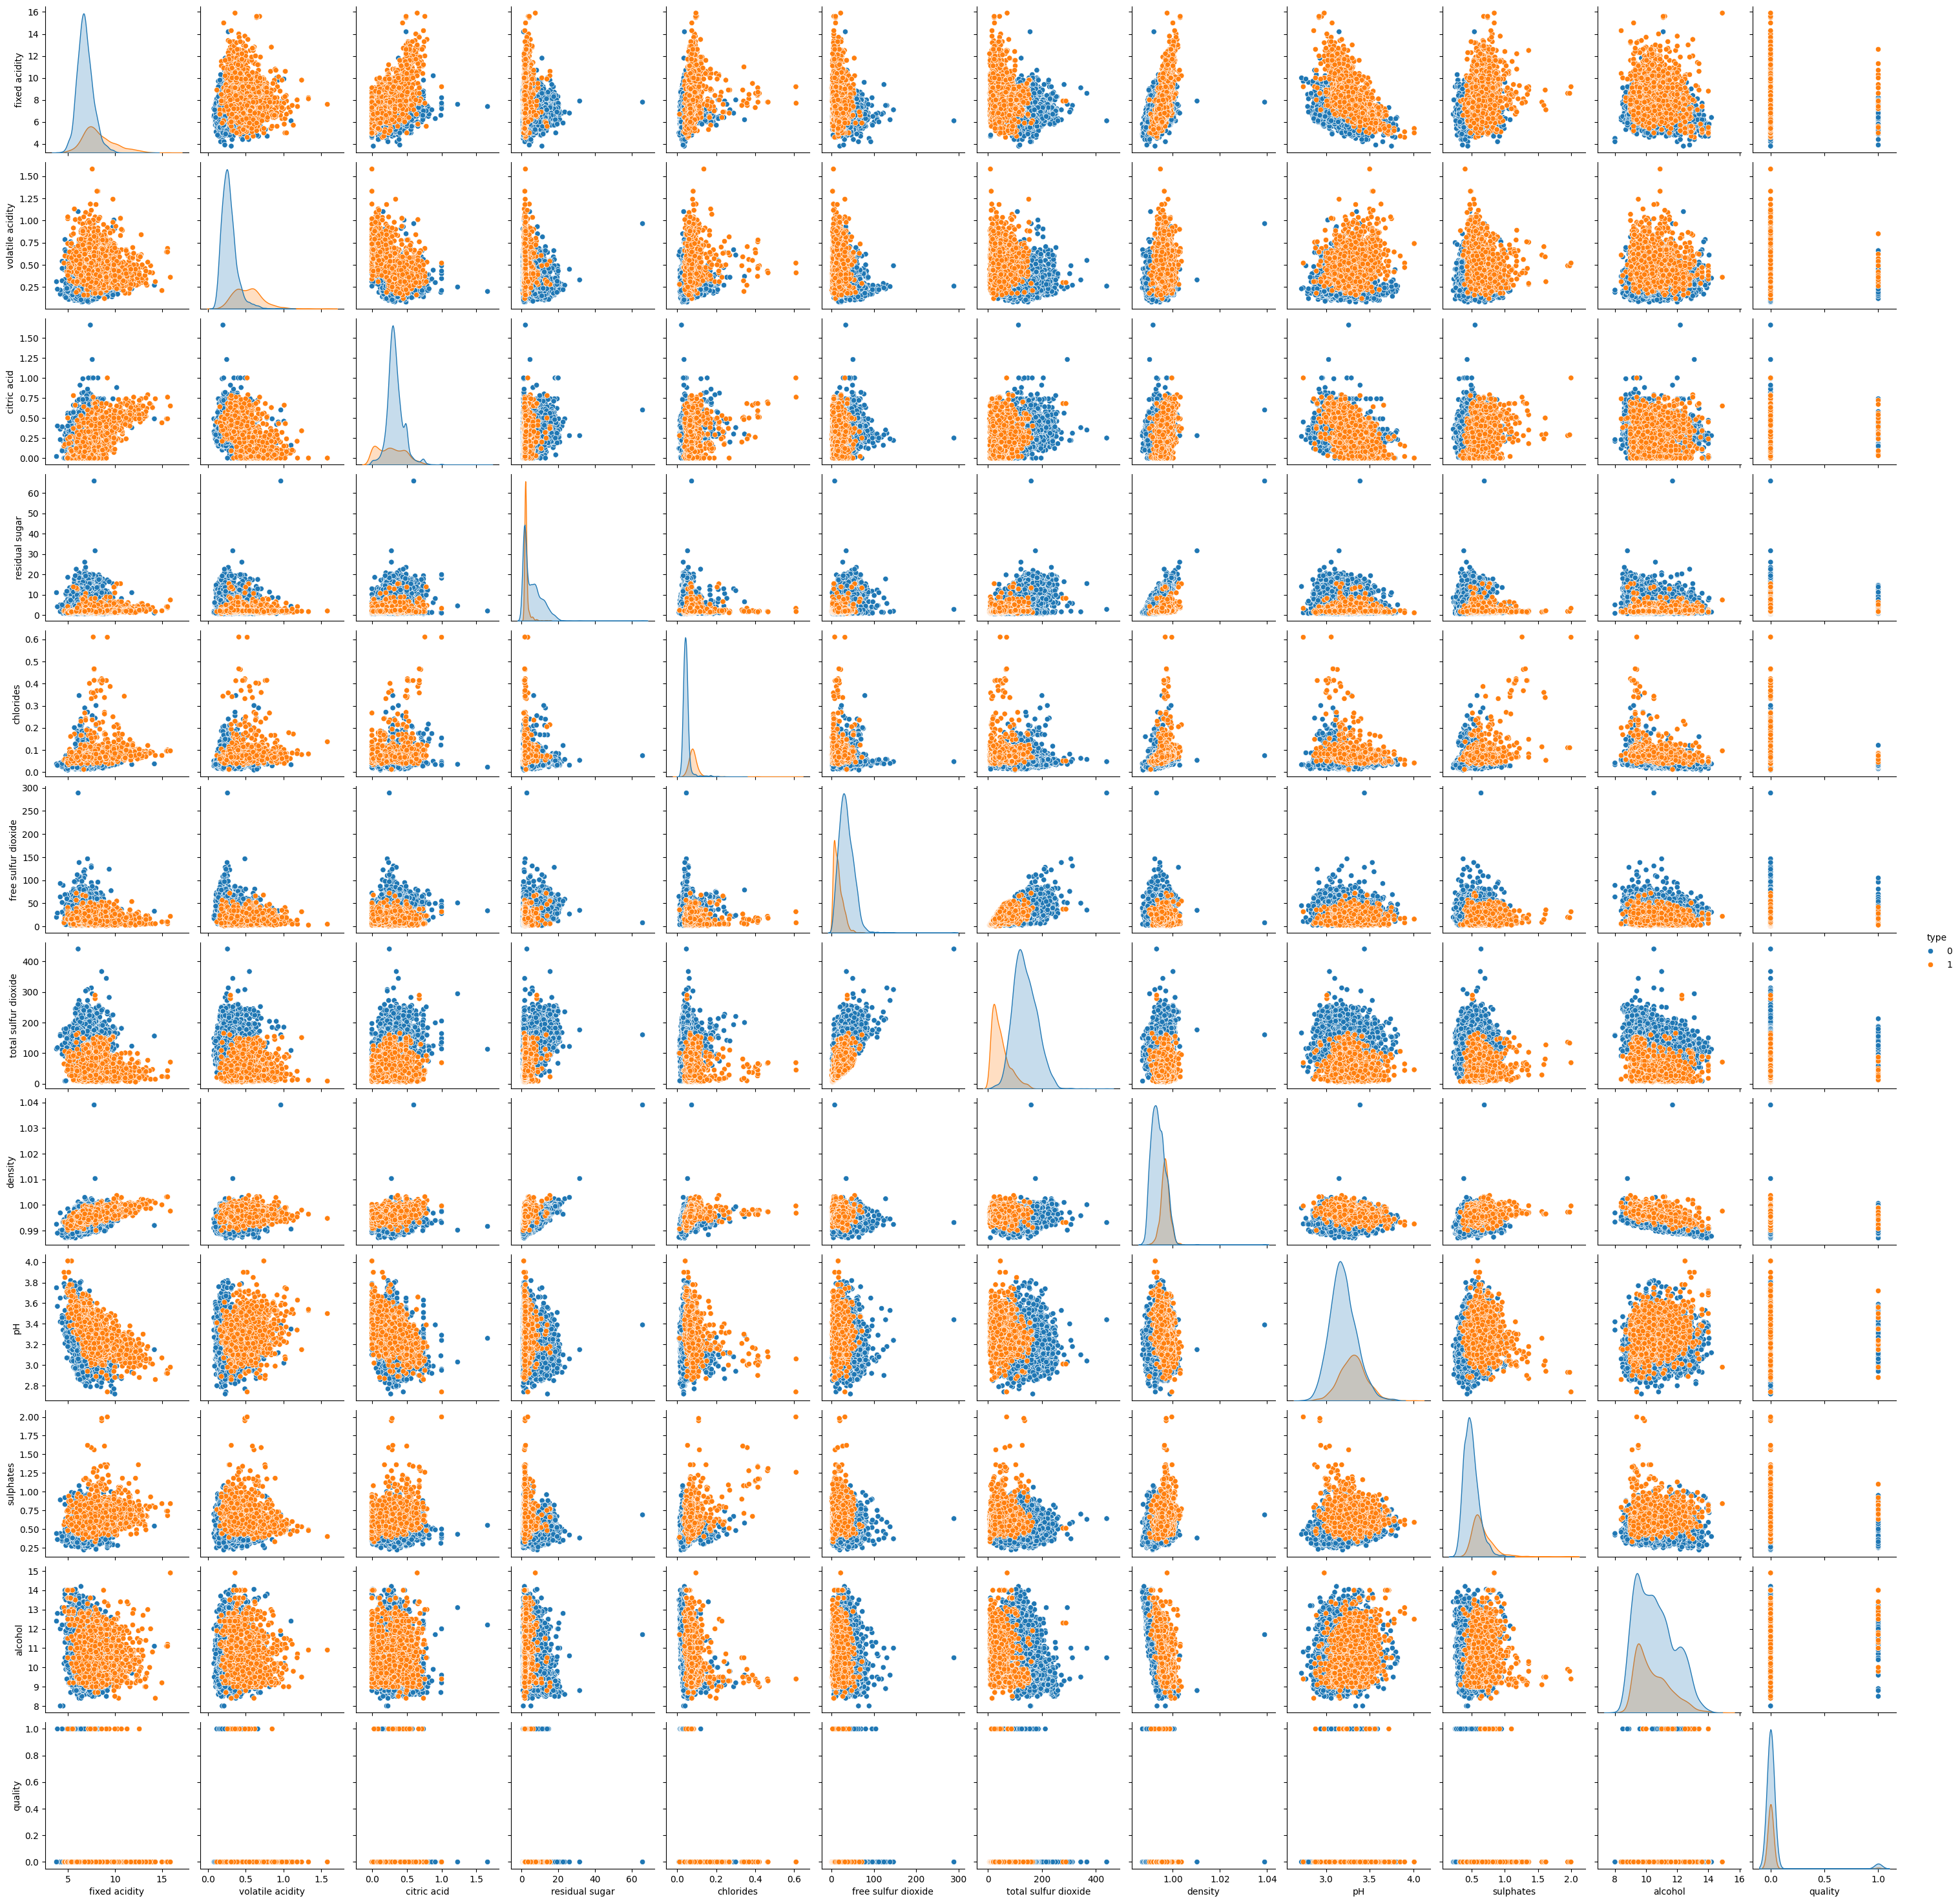

In [19]:
plt.figure(figsize=(25, 4))
sns.pairplot(data=df, hue='type')

<Figure size 2500x400 with 0 Axes>

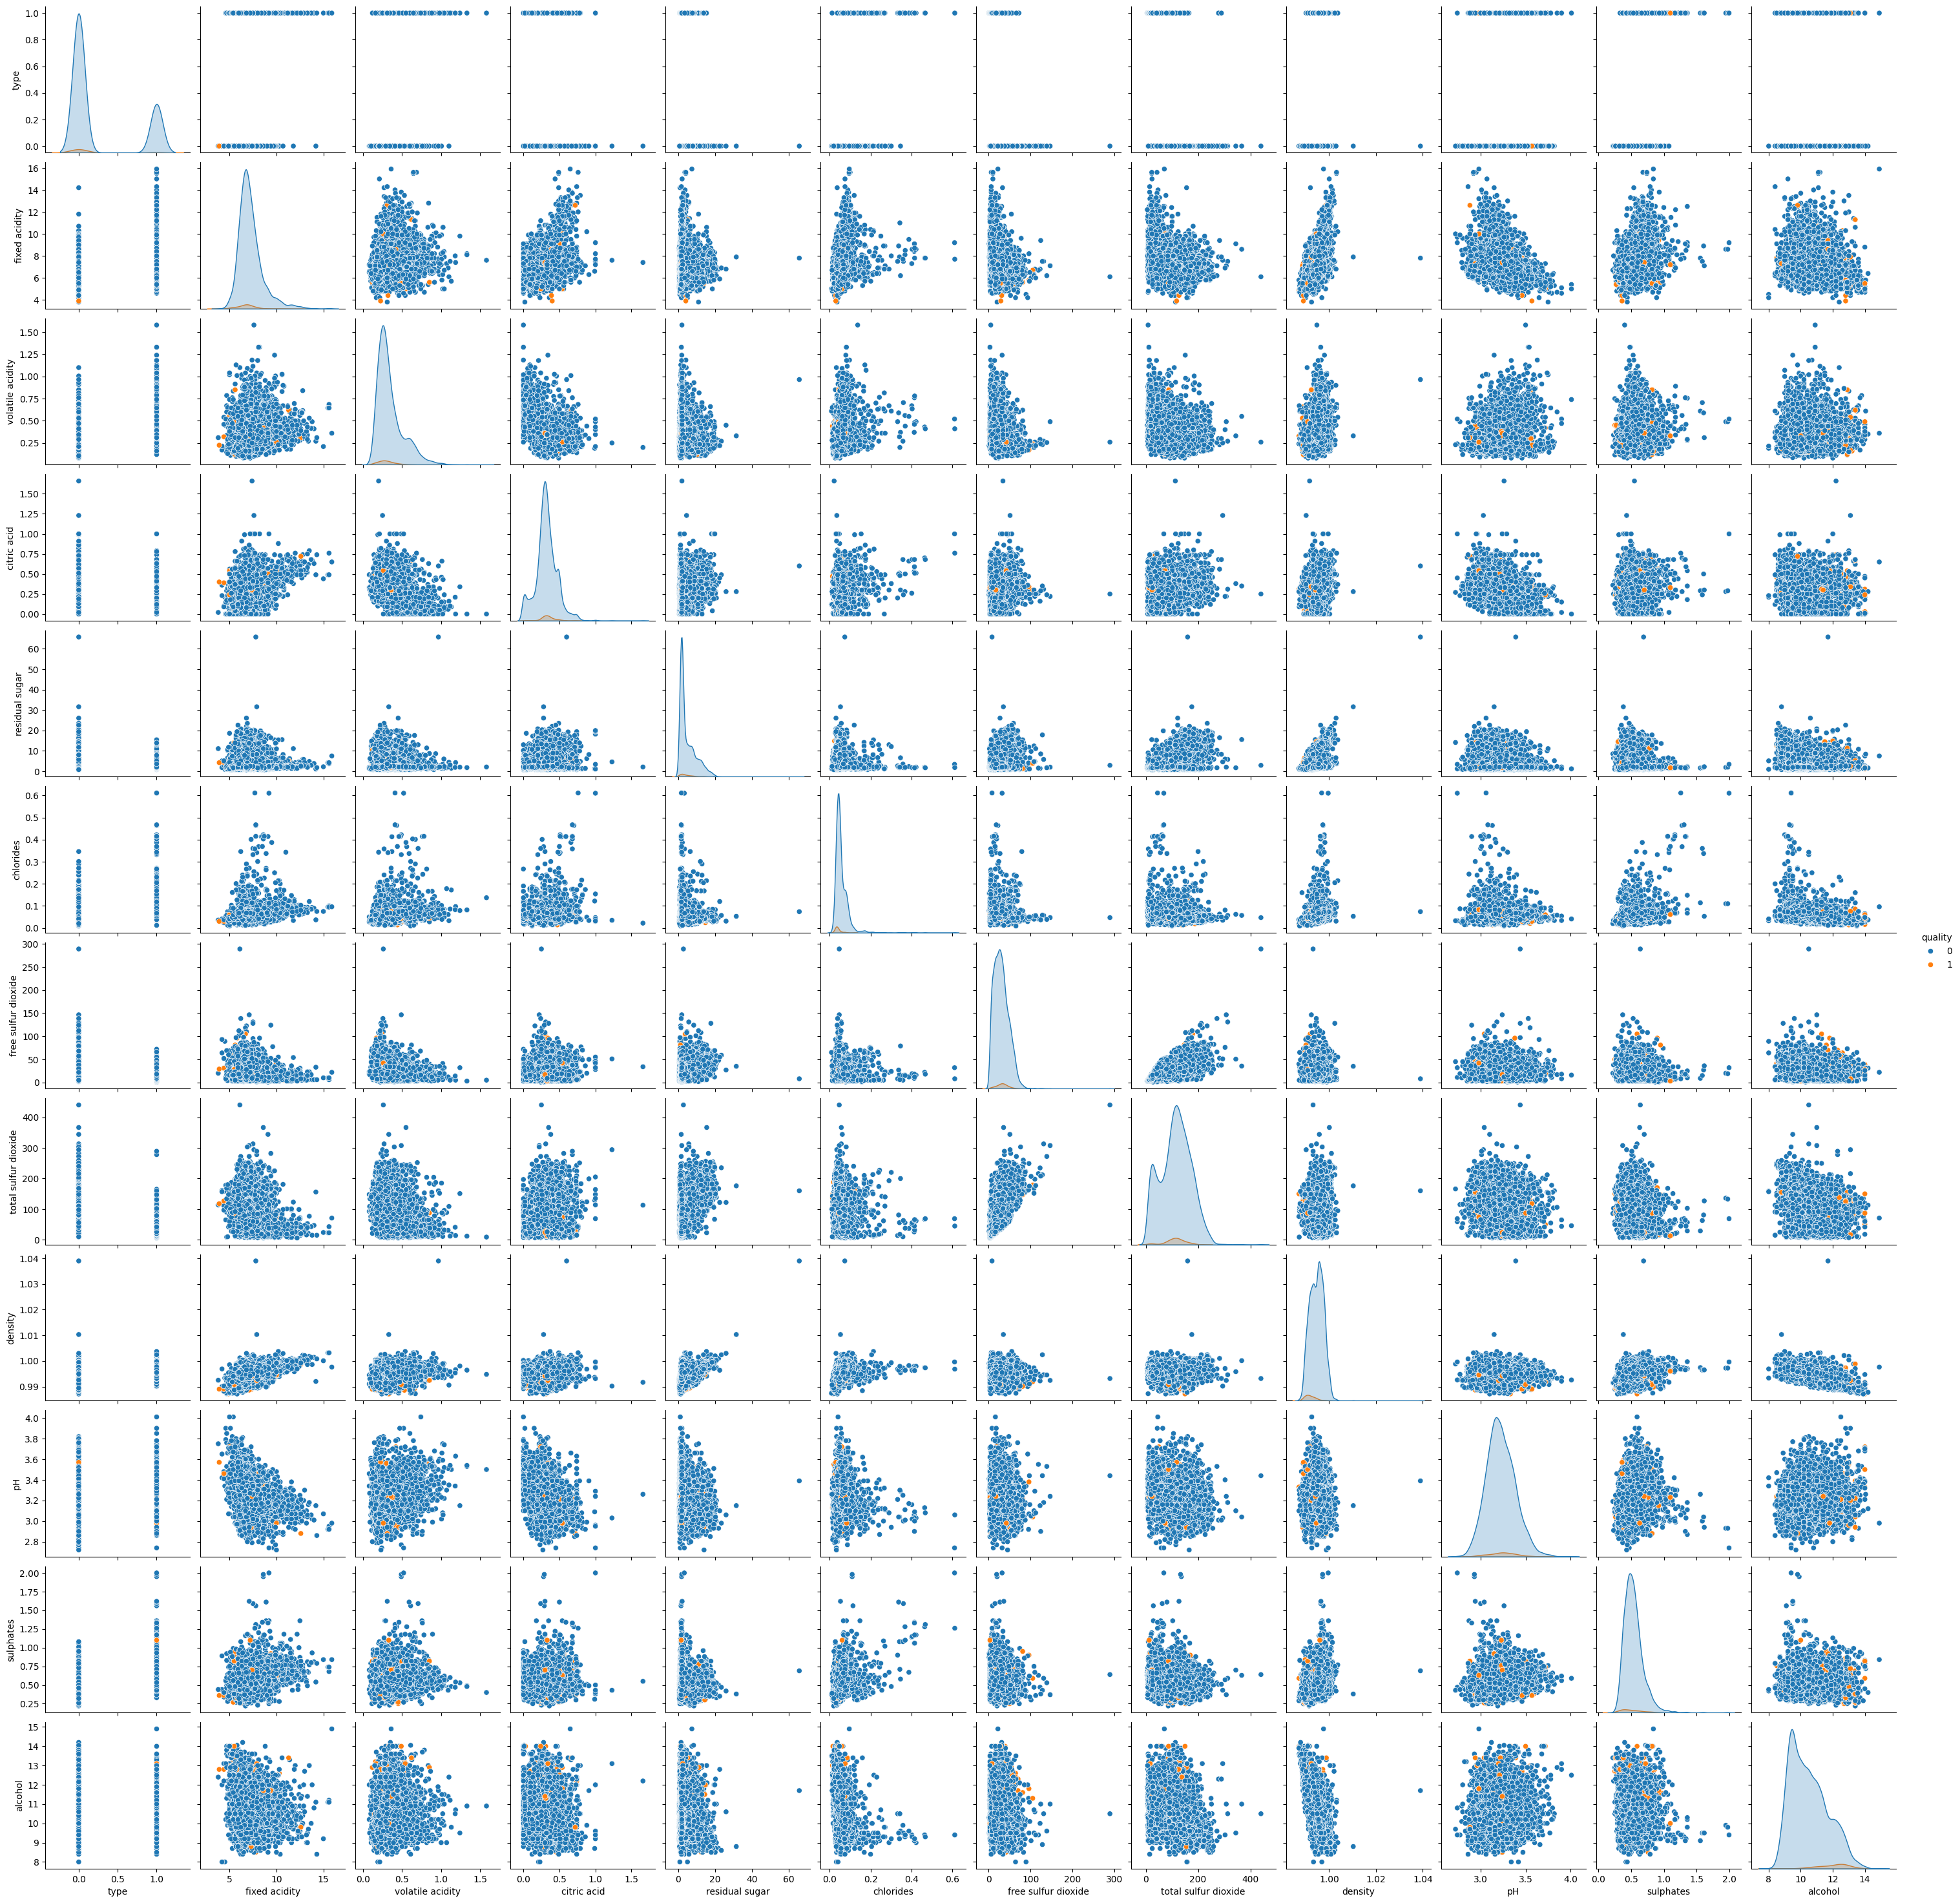

In [20]:
plt.figure(figsize=(25, 4))
sns.pairplot(data=df, hue='quality')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  0 non-null      float64
 1   fixed_acidity         5329 non-null   float64
 2   volatile_acidity      5329 non-null   float64
 3   citric_acid           5329 non-null   float64
 4   residual_sugar        5329 non-null   float64
 5   chlorides             5329 non-null   float64
 6   free_sulfur_dioxide   5329 non-null   float64
 7   total_sulfur_dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5329 non-null   float64
 10  sulphates             5329 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 582.9 KB


In [7]:
df.describe()

type  fixed acidity  volatile acidity  citric acid  \
count  6497.000000    6487.000000       6489.000000  6494.000000   
mean      0.246114       7.216579          0.339691     0.318722   
std       0.430779       1.296750          0.164649     0.145265   
min       0.000000       3.800000          0.080000     0.000000   
25%       0.000000       6.400000          0.230000     0.250000   
50%       0.000000       7.000000          0.290000     0.310000   
75%       0.000000       7.700000          0.400000     0.390000   
max       1.000000      15.900000          1.580000     1.660000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     6495.000000  6495.000000          6497.000000           6497.000000   
mean         5.444326     0.056042            30.525319            115.744574   
std          4.758125     0.035036            17.749400             56.521855   
min          0.600000     0.009000             1.000000              6.000000   
25%          1.800000     0.038000            17.000000             77.000000   
50%          3.000000     0.047000            29.000000            118.000000   
75%          8.100000     0.065000            41.000000            156.000000   
max         65.800000     0.611000           289.000000            440.000000   

           density           pH    sulphates      alcohol      quality  
count  6497.000000  6488.000000  6493.000000  6497.000000  6497.000000  
mean      0.994697     3.218395     0.531215    10.491801     0.196552  
std       0.002999     0.160748     0.148814     1.192712     0.397421  
min       0.987110     2.720000     0.220000     8.000000     0.000000  
25%       0.992340     3.110000     0.430000     9.500000     0.000000  
50%       0.994890     3.210000     0.510000    10.300000     0.000000  
75%       0.996990     3.320000     0.600000    11.300000     0.000000  
max       1.038980     4.010000     2.000000    14.900000     1.000000

In [40]:
df.quality.value_counts()

quality
0    5329
Name: count, dtype: int64

In [24]:
df_normalized.describe()

type  fixed acidity  volatile acidity  citric acid  \
count  5329.000000    5329.000000       5329.000000  5329.000000   
mean      0.255020       0.214879          0.167167     0.192011   
std       0.435913       0.082890          0.106394     0.088599   
min       0.000000       0.000000          0.000000     0.000000   
25%       0.000000       0.163522          0.094937     0.144578   
50%       0.000000       0.201258          0.139241     0.186747   
75%       1.000000       0.245283          0.208861     0.240964   
max       1.000000       0.761006          0.949367     1.000000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     5329.000000  5329.000000          5329.000000           5329.000000   
mean         0.067688     0.078017             0.100554              0.245885   
std          0.068437     0.060291             0.061646              0.129049   
min          0.000000     0.000000             0.000000              0.000000   
25%          0.018237     0.047463             0.051903              0.156818   
50%          0.031915     0.062193             0.093426              0.250000   
75%          0.104863     0.093290             0.138408              0.336364   
max          0.990881     0.985270             0.996540              0.986364   

           density           pH    sulphates      alcohol      quality  
count  5329.000000  5329.000000  5329.000000  5329.000000  5329.000000  
mean      0.007147     0.125794     0.156634     0.171043     0.028898  
std       0.002854     0.039935     0.074834     0.079606     0.167537  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.004899     0.097257     0.105000     0.100671     0.000000  
50%       0.007247     0.122195     0.145000     0.161074     0.000000  
75%       0.009298     0.152120     0.190000     0.228188     0.000000  
max       0.049924     0.321696     0.890000     0.463087     1.000000

<Axes: >

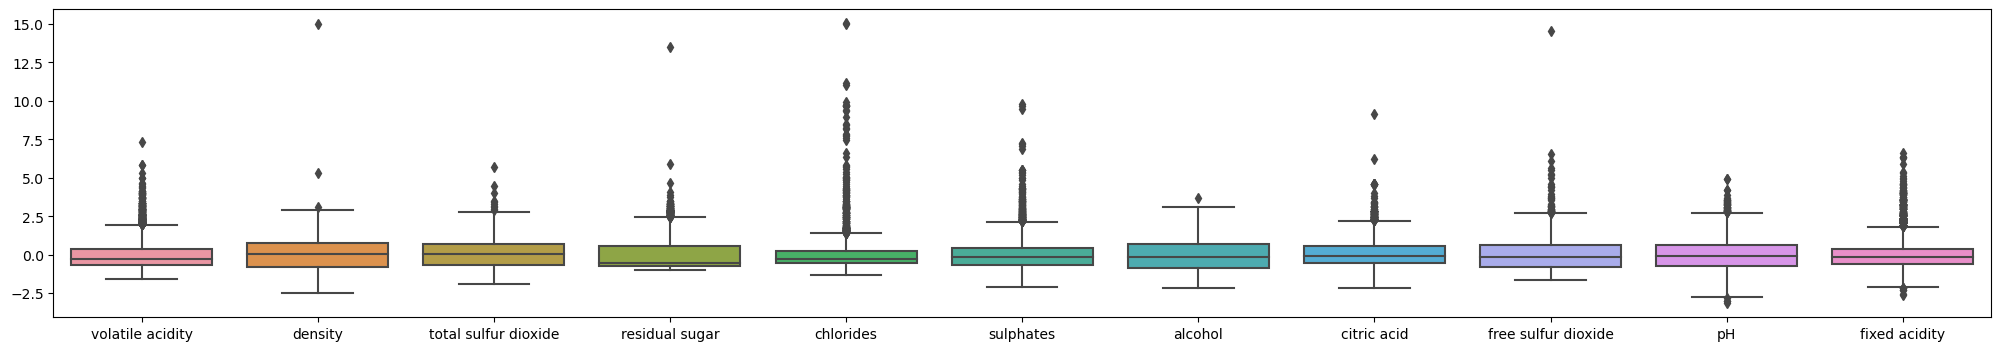

In [26]:
plt.figure(figsize=(25, 4))
wanted_features = list(set(df.columns) - set(['free sulfur dioxide', 'total sulfur dioxide', 'residual sugar', 'fixed acidity']))
# sns.boxplot(data=df[wanted_features])
wanted_features = list(set(df.columns) - set(['type', 'quality']))
sns.boxplot(data=df_normalized[wanted_features])
# sns.boxplot(data=df[['residual sugar']])

<Axes: >

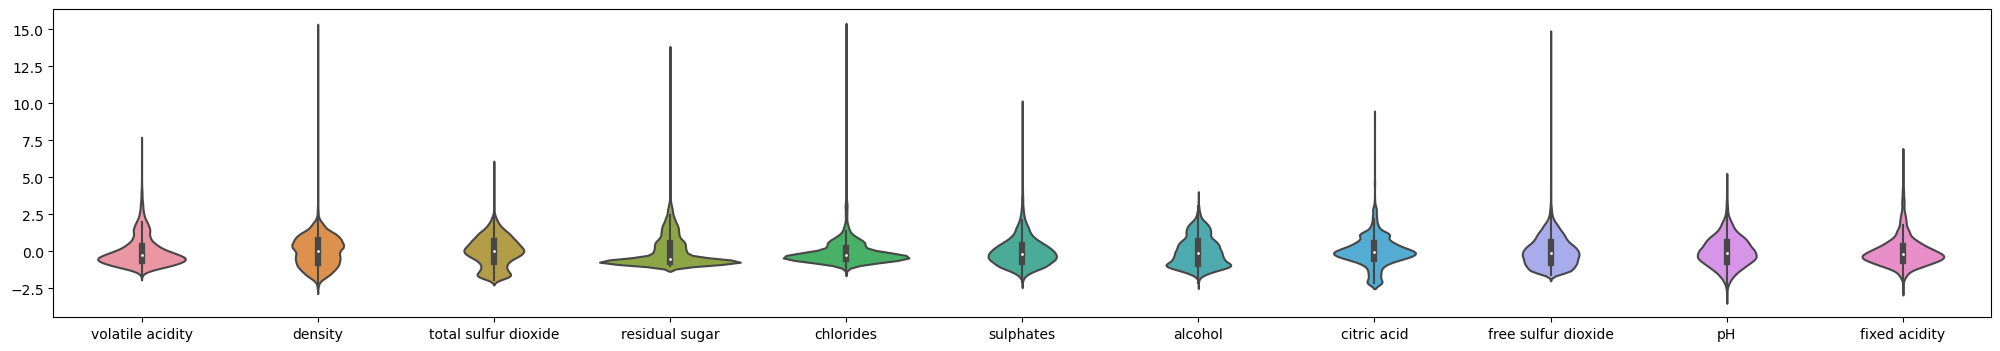

In [27]:
plt.figure(figsize=(25, 4))
sns.violinplot(data = df_normalized[wanted_features])

In [10]:
important_feats = ['type', 'fixed_acidity', 'volatile_acidity', 'sulphates', 'alcohol', 'density', 'quality']

<Axes: >

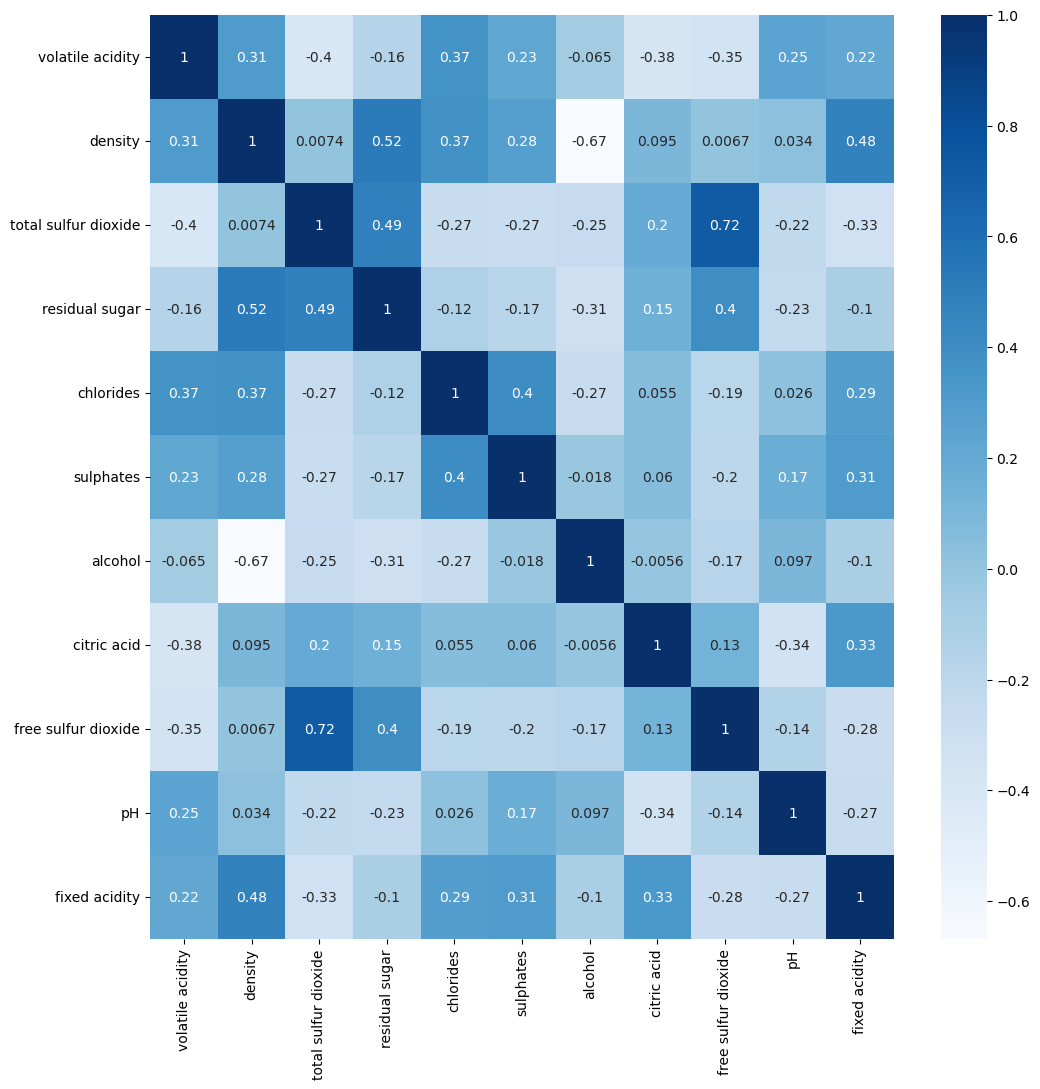

In [28]:
plt.figure(figsize=(12, 12))
corr = df_normalized[list(set(df.columns) - set(['type', 'quality']))].corr()
sns.heatmap(corr, annot=True, cmap='Blues')

In [29]:
df_normalized['type'] = df_normalized['type'].map(cat_to_num)

In [30]:
df_normalized.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0      -0.164325         -0.440943     0.280549        3.474485   
1     0      -0.695451         -0.262479     0.144564       -0.766981   
2     0       0.670302         -0.381455     0.552519        0.409970   
3     0      -0.012575         -0.678894     0.008579        0.765276   
6     0      -0.771326         -0.143504    -1.079302        0.432177   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0  -0.316749             0.838583              0.982904  2.179679 -1.401491   
1  -0.208165            -0.901466              0.313671 -0.180697  0.471875   
2  -0.181019            -0.003376             -0.302728  0.190219  0.222092   
3   0.036151             0.950845              1.264686  0.358817 -0.215026   
6  -0.316749            -0.003376              0.384116  0.122780 -0.277472   

   sulphates   alcohol  quality  
0  -0.556350 -1.474150        6  
1  -0.289091 -0.883997        6  
2  -0.623164 -0.378152        6  
3  -0.890423 -0.546767        6  
6  -0.422720 -0.799690        6

In [31]:
map_quality = {3: 0, 4:1, 5:2, 6: 3, 7:4, 8:5, 9:6}

In [32]:
df_normalized['quality'] = df_normalized['quality'].map(map_quality)

In [33]:
df_normalized.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0      -0.164325         -0.440943     0.280549        3.474485   
1     0      -0.695451         -0.262479     0.144564       -0.766981   
2     0       0.670302         -0.381455     0.552519        0.409970   
3     0      -0.012575         -0.678894     0.008579        0.765276   
6     0      -0.771326         -0.143504    -1.079302        0.432177   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0  -0.316749             0.838583              0.982904  2.179679 -1.401491   
1  -0.208165            -0.901466              0.313671 -0.180697  0.471875   
2  -0.181019            -0.003376             -0.302728  0.190219  0.222092   
3   0.036151             0.950845              1.264686  0.358817 -0.215026   
6  -0.316749            -0.003376              0.384116  0.122780 -0.277472   

   sulphates   alcohol  quality  
0  -0.556350 -1.474150        3  
1  -0.289091 -0.883997        3  
2  -0.623164 -0.378152        3  
3  -0.890423 -0.546767        3  
6  -0.422720 -0.799690        3

In [8]:
# column_rename = {old_name: old_name.replace(" ", "_") for old_name in df_normalized.columns}
# df_normalized.columns(mapper=column_rename, inplace=True)
new_columns = [old_name.replace(" ", "_") for old_name in df.columns]
# df_normalized.columns = new_columns
df.columns = new_columns

In [11]:
df[important_feats].head()

type  fixed_acidity  volatile_acidity  sulphates  alcohol  density  quality
0     0            7.0              0.27       0.45      8.8   1.0010        0
1     0            6.3              0.30       0.49      9.5   0.9940        0
2     0            8.1              0.28       0.44     10.1   0.9951        0
3     0            7.2              0.23       0.40      9.9   0.9956        0
4     0            7.2              0.23       0.40      9.9   0.9956        0

In [19]:
df.quality.value_counts()

quality
0    5220
1    1277
Name: count, dtype: int64

In [12]:
df = df[important_feats]

In [13]:
X = df[df.columns[:-1]]
Y = df['quality'].astype(int)

In [14]:
X.shape, Y.shape

((6497, 6), (6497,))

In [15]:
wine_fg = fs.get_or_create_feature_group(
    name='wine',
    version=4,
    primary_key=list(df.columns[:-1]),
    description="Wine Dataset ; classification task"
)
wine_fg.insert(df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/224405/fs/224324/fg/239980


Uploading Dataframe: 100.00% |██████████| Rows 6497/6497 | Elapsed Time: 00:08 | Remaining Time: 00:00


Launching job: wine_4_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/224405/jobs/named/wine_4_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7f9ad9e4b6d0>, None)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              6497 non-null   int64  
 1   fixed_acidity     6487 non-null   float64
 2   volatile_acidity  6489 non-null   float64
 3   sulphates         6493 non-null   float64
 4   alcohol           6497 non-null   float64
 5   density           6497 non-null   float64
 6   quality           6497 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 355.4 KB
